# Exploring Cancer Data
The data was extracted from kaggle in __[CancerData] (https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download)__

### Basic information about the proyect: 
**Date:** _03 - 05 - 2024_ 

**Affiliation:**_Universidad Icesi_

**Course:** _Analisis Exploratorio de datos_ 

**Name:** _Simon Garcia_ 

**Description**: The following proyect is used to extract, organize, and make a preliminary analysis about a breast cancer dataset using python. 

## SMART question:

Teniendo en cuenta la base de datos proveida, ¿Cuáles son los 5 parámetros más importantes para generar el modelo más exacto posible que prediga si el cancer mamario de un paciente es maligno o benigno?

## Upload the data

In [17]:
#Import the libraries that will be used
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Upload the data set
data = pd.read_csv("Cancer_Data.csv", header = None)

#Check if the data is there
data.head()


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,NaN
1,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN
2,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,NaN
3,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758,NaN
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,NaN


In [3]:
#The titles are in row one. The dataset upload can be adjusted so the titles are included.
data = pd.read_csv("Cancer_Data.csv", header = 0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Analize the main patters in the structure
1. Data Frame Size
2. Columns
3. Names
    - Check for descriptive names
4. Data types
5. Scales

In [ ]:
#print the total size of the DataSet 
data.shape
#Its composed of 569 entries and 33 columns

(569, 33)

In [14]:
#Here we can see all the names of the variables and check if they need fixing
data.columns
#The Unnamed column should be checked afterwards to see what data it has and if it should be changed

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
#Printing the basic information of the dataset
data.info()

#The dataset seems to have no null entries, except for the last column called "unnamed" which is completely filled with nulls.
#From the remaining 32 columns, 31 are floats.
#The only int is ID
#The only object is Diagnosis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Division between the categorical and numerical variables

### Categorical variables

In [31]:
#First we'll see the unique entries for diagnosis
print(data["diagnosis"].unique())

['M' 'B']


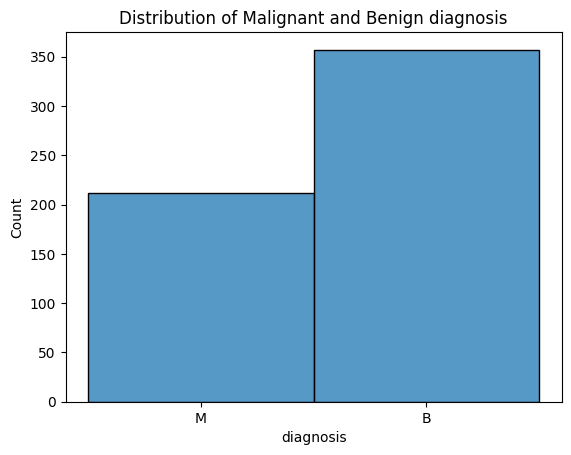

In [33]:
#Lets quickly see the proportion between malignant and benign patients
sns.histplot(data["diagnosis"], bins = 5)

#Add a title to the chart
plt.title("Distribution of Malignant and Benign diagnosis")
plt.show()

In [22]:
#Now we're going to fill the last empty column with the following code
#1 = Malignant
#2 = Benign

data["Unnamed: 32"] = data["diagnosis"].replace({"M":1,"B":0})

data[["diagnosis","Unnamed: 32"]].tail(10)

/tmp/ipykernel_50061/3854280339.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Unnamed: 32"] = data["diagnosis"].replace({"M":1,"B":0})


,diagnosis,Unnamed: 32
559,B,0
560,B,0
561,B,0
562,M,1
563,M,1
564,M,1
565,M,1
566,M,1
567,M,1
568,B,0


In [25]:
#Now we're going to rename the last column so its unique and its useful
data.rename(columns = {"Unnamed: 32": "Int_Diagnosis"}, inplace= True)
#Here we check that the name was correctly changed
print(data.columns[32])

Int_Diagnosis


## Numerical Variables

In [47]:
#Now we observe the rest of float variables, excluding: ID, diagnosis and Int_diagnosis
data[data.columns[2:32]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
